In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_excel('bank.xlsx')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.shape

(41188, 21)

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

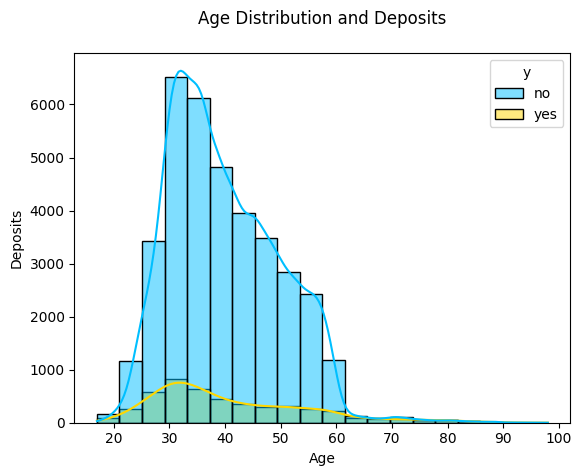

In [ ]:
sns.histplot(data=df, x='age', hue='y', bins=20, kde=True, palette=['deepskyblue', 'gold'])
plt.title("Age Distribution and Deposits\n")
plt.xlabel('Age')
plt.ylabel('Deposits')
plt.show()

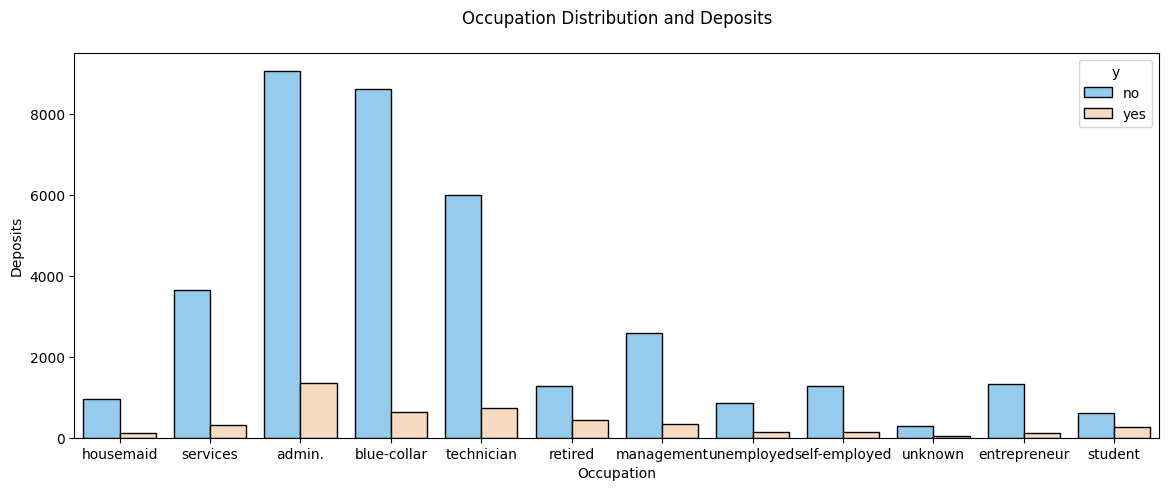

In [ ]:
plt.figure(figsize=(14,5))
sns.countplot(data=df, x='job',hue='y', palette=['lightskyblue','peachpuff'], edgecolor='black')
plt.xlabel('Occupation')
plt.ylabel('Deposits')
plt.title("Occupation Distribution and Deposits\n")
plt.show()

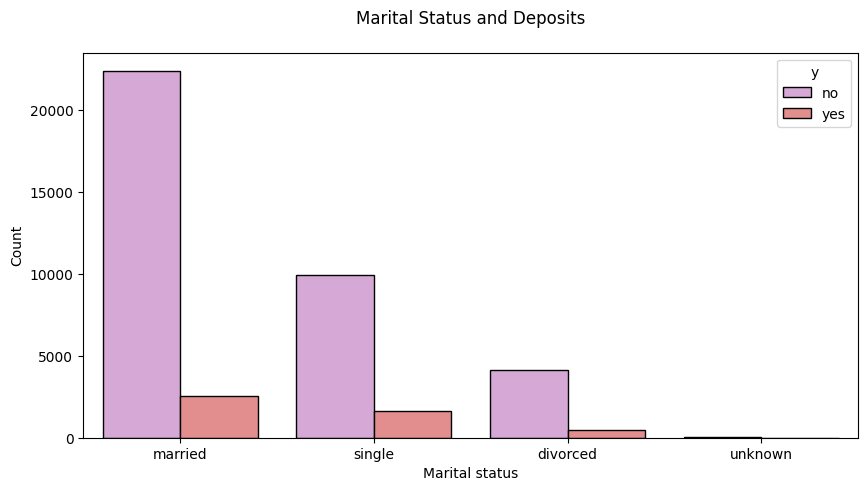

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='marital',hue='y', palette=['plum','lightcoral'],  edgecolor='black')
plt.xlabel('Marital status')
plt.ylabel('Count')
plt.title("Marital Status and Deposits\n")
plt.show()

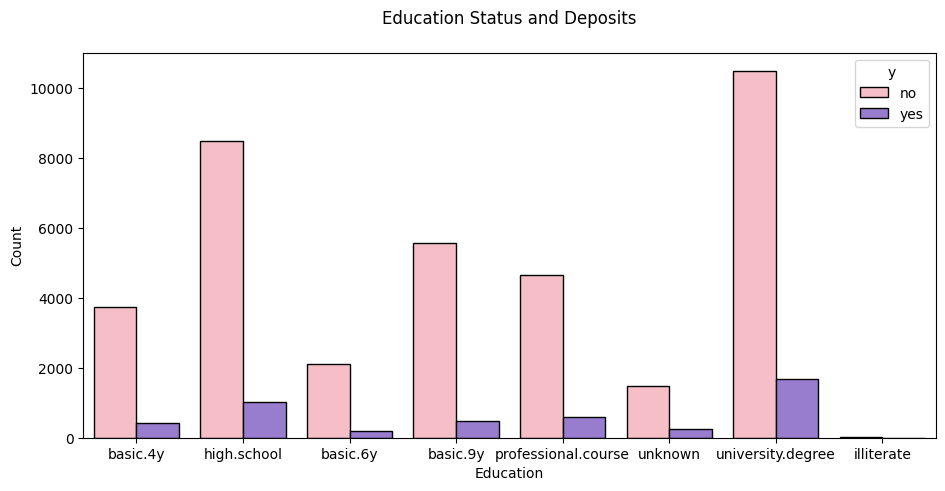

In [ ]:
plt.figure(figsize=(11,5))
sns.countplot(data=df, x='education',hue='y', palette=['lightpink','mediumpurple'], edgecolor='black')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title("Education Status and Deposits\n")
plt.show()

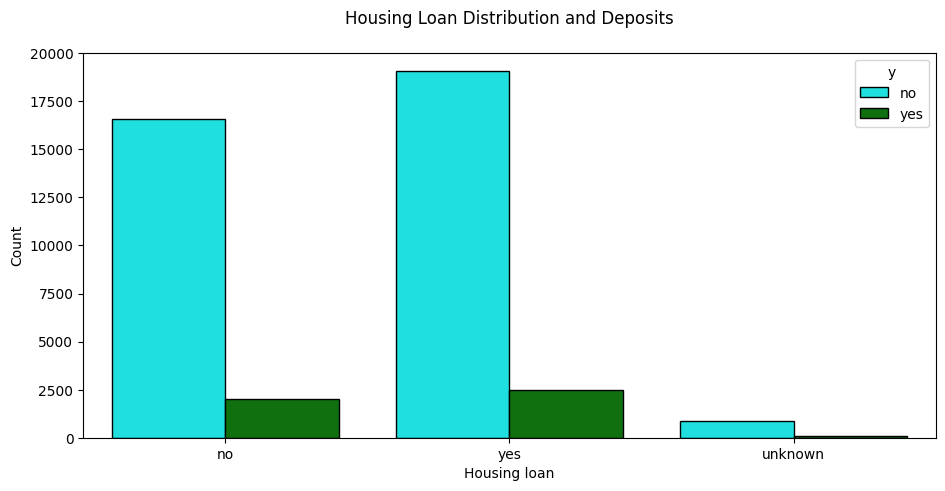

In [ ]:
plt.figure(figsize=(11,5))
sns.countplot(data=df, x='housing',hue='y', palette=['aqua','green'], edgecolor='black')
plt.xlabel('Housing loan')
plt.ylabel('Count')
plt.title("Housing Loan Distribution and Deposits\n")
plt.show()

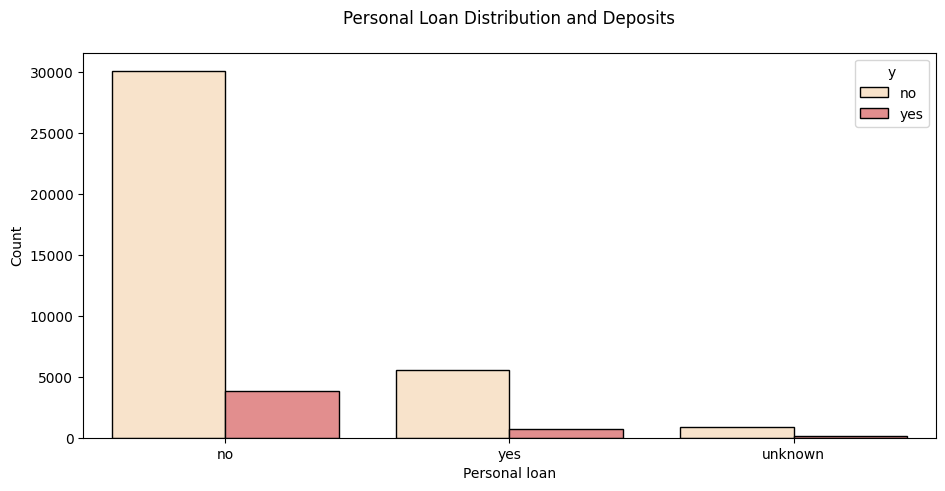

In [ ]:
plt.figure(figsize=(11,5))
sns.countplot(data=df, x='loan',hue='y', palette=['bisque','lightcoral'], edgecolor='black')
plt.xlabel('Personal loan')
plt.ylabel('Count')
plt.title("Personal Loan Distribution and Deposits\n")
plt.show()

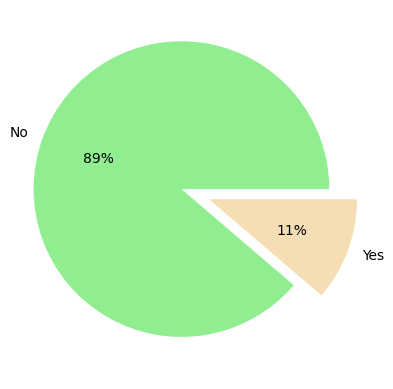

In [ ]:
yes_no=df['y'].value_counts()
ex=[0.1,0.1]
c=['lightgreen', 'wheat']
l=['No', 'Yes']
plt.pie(yes_no, explode=ex, colors=c, autopct='%.0f%%', labels=l)
plt.show()

In [ ]:
obj_cols = df.select_dtypes("object").columns
obj_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[obj_cols]=df[obj_cols].apply(le.fit_transform)

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


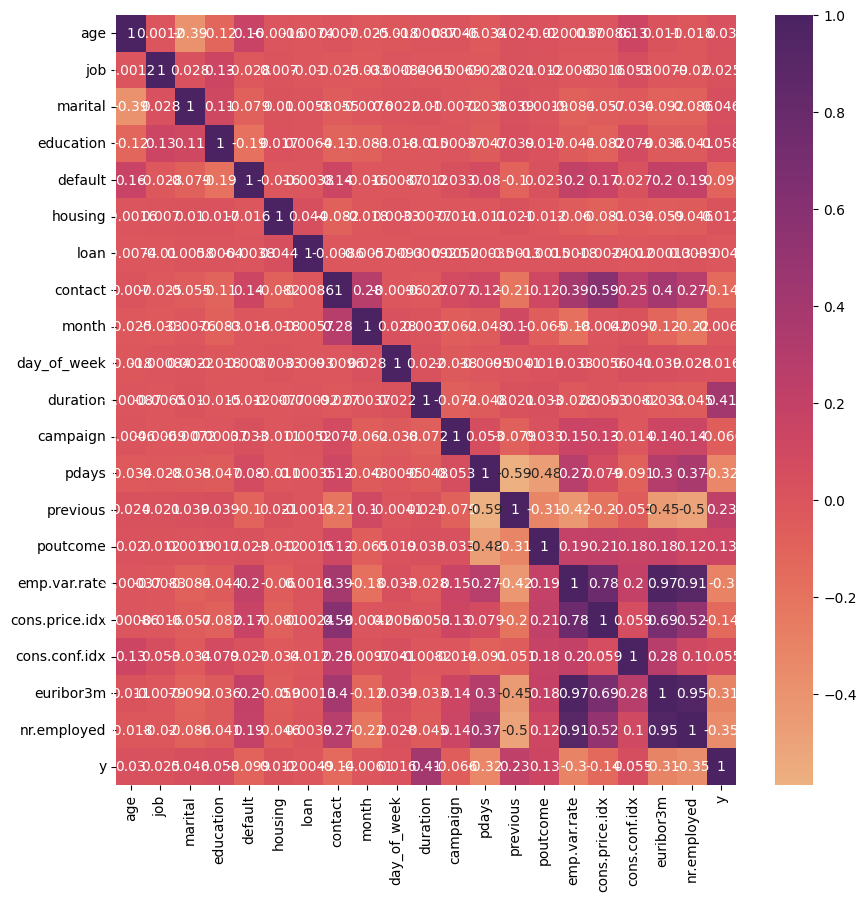

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='flare', annot=True)
plt.show()


In [ ]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X = sc.fit_transform(X)
X_df = pd.DataFrame(X)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split((X),y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, min_samples_leaf = 3, random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       random_state=0)

In [ ]:
y_pred=classifier.predict(X_test)

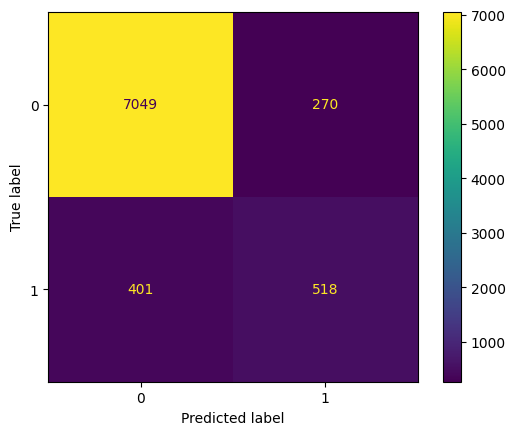

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=classifier.classes_).plot()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
accuracy = accuracy_score(y_test, y_pred)*100
print('accuracy', accuracy)
precision = precision_score(y_test, y_pred, average='weighted')*100
print('precision', precision)
recall = recall_score(y_test, y_pred, average='weighted')*100
print('recall', recall)
f1 = f1_score(y_test, y_pred, average='weighted')*100
print('f1',f1)
roc_auc_nb = roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1], multi_class='ovr', average='weighted')*100
print('roc_auc_nb',roc_auc_nb)

accuracy 91.854819130857
precision 91.39554933403214
recall 91.854819130857
f1 91.57840063439721
roc_auc_nb 93.54295117229577


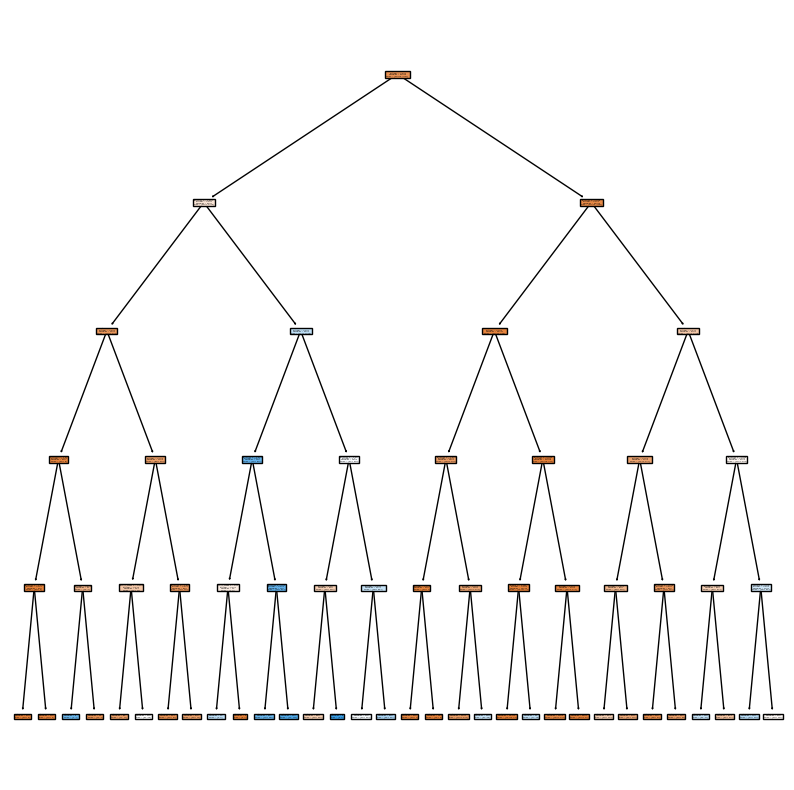

In [ ]:
X_=df.iloc[:,:-1]
from sklearn import tree
fig = plt.figure(figsize=(10,10))
t= tree.plot_tree(classifier,filled=True,feature_names=X_.columns)

In [ ]:
import pandas as pd
import numpy as np

rng = pd.date_range('2023-01-01', periods=100, freq='D')
ts = pd.DataFrame(np.random.randn(len(rng)), index=rng, columns=['value'])

# Resample to monthly frequency
monthly_resampled = ts.resample('M').mean()
print(monthly_resampled)


               value
2023-01-31 -0.177825
2023-02-28  0.169744
2023-03-31 -0.348324
2023-04-30  0.057203
